In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
pip install tensorflow

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [7]:
df = pd.read_csv("agricultural_yield.csv")
df.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374


In [8]:
x = df[['Soil_Quality', 'Seed_Variety', 'Fertilizer_Amount_kg_per_hectare', 'Sunny_Days','Rainfall_mm', 'Irrigation_Schedule']].values
y= df['Yield_kg_per_hectare'].values

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size=0.2,random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,057 (19.75 KB)

 Trainable params: 5,057 (19.75 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 315769.2500 - mae: 490.3225 - val_loss: 52875.1250 - val_mae: 183.5109
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49059.7969 - mae: 178.9139 - val_loss: 45873.3516 - val_mae: 171.6873
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42701.6367 - mae: 168.0603 - val_loss: 39327.8828 - val_mae: 157.8787
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 37953.8867 - mae: 158.9403 - val_loss: 34605.1016 - val_mae: 147.6601
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 35855.0195 - mae: 154.0860 - val_loss: 32059.1992 - val_mae: 143.2840
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32083.2617 - mae: 146.7657 - val_loss: 29922.2559 - val_mae: 138.9305
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 30474.5527 - mae: 143.6653 - val_loss: 28225.9746 - val_mae: 134.2711
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 29454.4141 - mae: 139.9182 - val_loss: 28202.

In [21]:
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=1)
print(f'Test Mean Absolute Error: {test_mae:.2f}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2609.3188 - mae: 41.3219 
Test Mean Absolute Error: 39.28


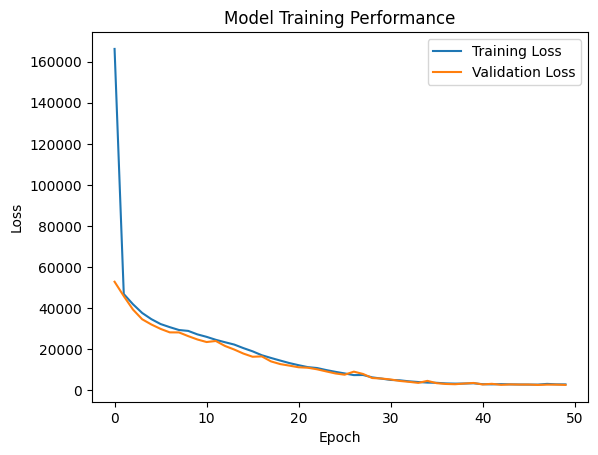

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [25]:
y_pred = model.predict(x_test)
y_pred

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[ 439.34143],
       [ 664.76056],
       [1082.8551 ],
       [ 665.6147 ],
       [ 811.2887 ],
       [ 997.24066],
       [ 314.34024],
       [ 603.46893],
       [ 458.14056],
       [ 807.8021 ],
       [ 595.49176],
       [ 685.03076],
       [ 632.3656 ],
       [ 750.4396 ],
       [ 857.9711 ],
       [ 683.8369 ],
       [ 966.7367 ],
       [ 475.02222],
       [ 584.81885],
       [ 363.3459 ],
       [ 797.6633 ],
       [ 808.8751 ],
       [ 363.93866],
       [ 822.2569 ],
       [1016.1304 ],
       [ 601.6671 ],
       [ 663.3715 ],
       [ 979.0021 ],
       [ 645.6709 ],
       [ 636.86584],
       [ 691.6692 ],
       [ 809.6449 ],
       [ 826.81213],
       [ 808.5928 ],
       [ 474.32648],
       [ 715.2749 ],
       [ 725.79846],
       [1025.3673 ],
       [ 202.73868],
       [ 659.2649 ],
       [ 932.77234],
       [ 899.4835 ],
       [ 788.6398 ],
       [ 762.11255],
       [ 587.5412 ],
       [ 841.6179 ],
       [ 611.1477 ],
       [ 564.

<ipython-input-26-c3b0645f4049>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual Yield')
<ipython-input-26-c3b0645f4049>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Predicted Yield')


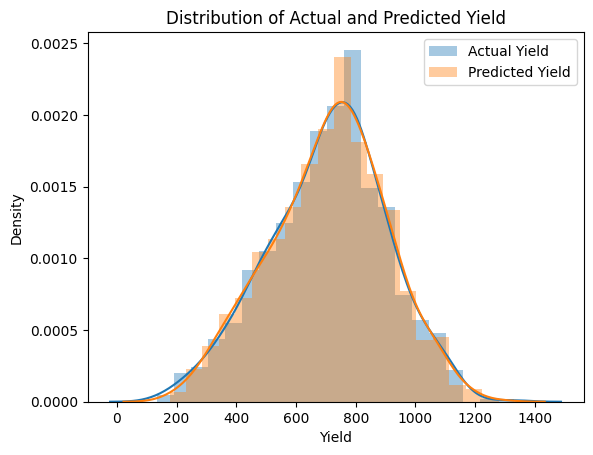

In [26]:
# Distribution plots
sns.distplot(y_test, label='Actual Yield')
sns.distplot(y_pred, label='Predicted Yield')
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()

In [27]:
predictions = model.predict(x_test)
predictions

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[ 439.34143],
       [ 664.76056],
       [1082.8551 ],
       [ 665.6147 ],
       [ 811.2887 ],
       [ 997.24066],
       [ 314.34024],
       [ 603.46893],
       [ 458.14056],
       [ 807.8021 ],
       [ 595.49176],
       [ 685.03076],
       [ 632.3656 ],
       [ 750.4396 ],
       [ 857.9711 ],
       [ 683.8369 ],
       [ 966.7367 ],
       [ 475.02222],
       [ 584.81885],
       [ 363.3459 ],
       [ 797.6633 ],
       [ 808.8751 ],
       [ 363.93866],
       [ 822.2569 ],
       [1016.1304 ],
       [ 601.6671 ],
       [ 663.3715 ],
       [ 979.0021 ],
       [ 645.6709 ],
       [ 636.86584],
       [ 691.6692 ],
       [ 809.6449 ],
       [ 826.81213],
       [ 808.5928 ],
       [ 474.32648],
       [ 715.2749 ],
       [ 725.79846],
       [1025.3673 ],
       [ 202.73868],
       [ 659.2649 ],
       [ 932.77234],
       [ 899.4835 ],
       [ 788.6398 ],
       [ 762.11255],
       [ 587.5412 ],
       [ 841.6179 ],
       [ 611.1477 ],
       [ 564.

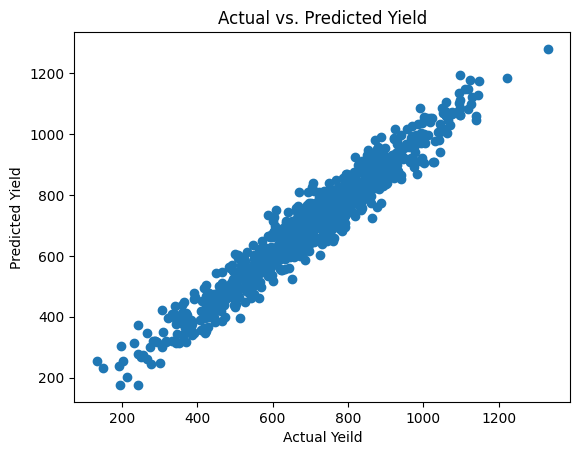

In [29]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Yeild')
plt.ylabel('Predicted Yield')
plt.title('Actual vs. Predicted Yield')
plt.show()
